In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Visualization with Matplotlib, Pandas, and Seaborn
## Getting started with matplotlib

Text(0.5, 1.03, 'Figure Title')

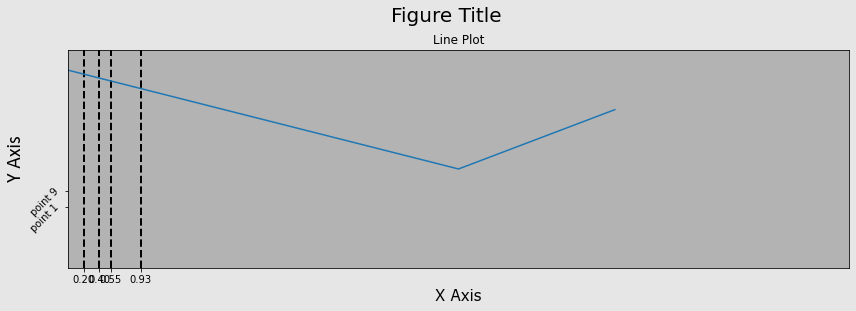

In [2]:
x = [-3, 5, 7]
y = [10, 2, 5]

fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
fig.set_size_inches(14, 4)
fig.set_facecolor('.9')
ax.set_facecolor('.7')
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)
ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
plt.suptitle('Figure Title', size=20, y=1.03)

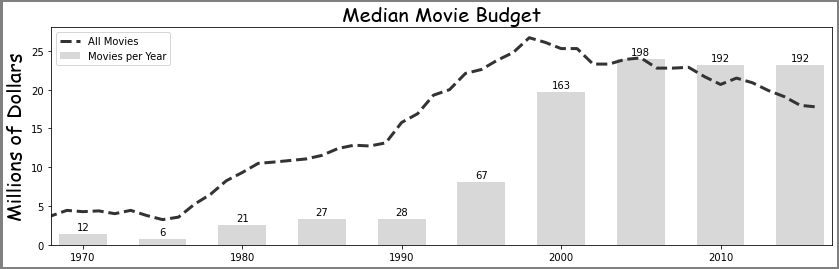

In [3]:
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()
years = med_budget_roll.index.values
budget = med_budget_roll.values
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()

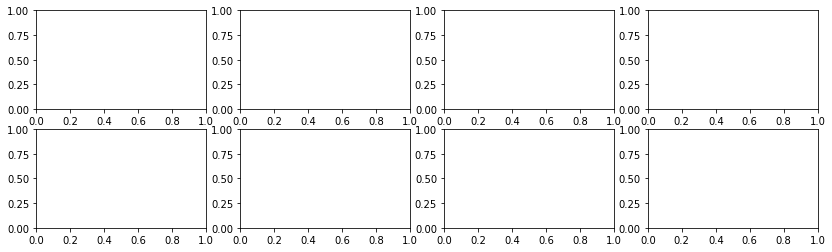

In [4]:
plot_objects = plt.subplots(2, 4, figsize=(14, 4))

## Visualizing data with matplotlib

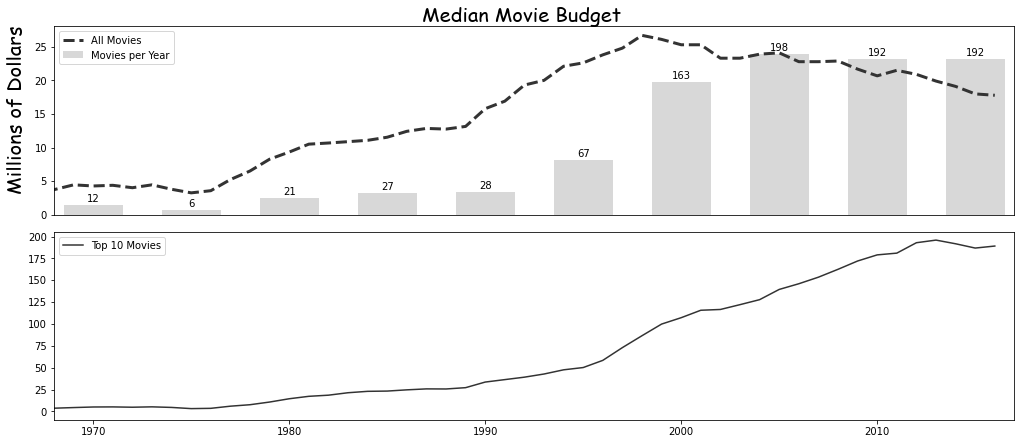

In [5]:
movie = pd.read_csv('data/movie.csv')

top10 = movie.sort_values('budget', ascending=False) \
             .groupby('title_year')['budget'] \
             .apply(lambda x: x.iloc[:10].median() / 1e6)

top10_roll = top10.rolling(5, min_periods=1).mean()

fig2, ax_array = plt.subplots(2, 1, figsize=(14,6), sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible=False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

ax2.plot(years, top10_roll.values, color='.2', label='Top 10 Movies')
ax2.legend(loc='upper left')

fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical', ha='center', **text_kwargs)

import os
# path = os.path.expanduser('~/Desktop/movie_budget.png')
#fig2.savefig(path, bbox_inches='tight')

## Dibujando con Pandas

<AxesSubplot:>

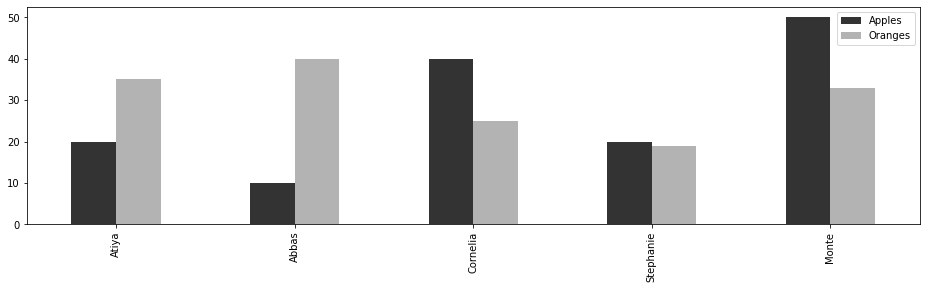

In [6]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
color = ['.2', '.7']
df.plot(kind='bar', color=color, figsize=(16,4))

<AxesSubplot:ylabel='Density'>

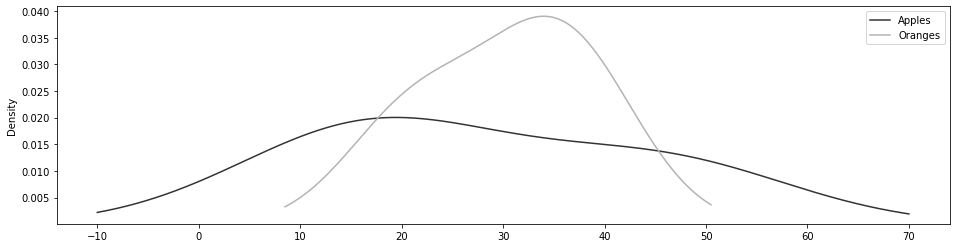

In [7]:
df.plot(kind='kde', color=color, figsize=(16,4))

<AxesSubplot:title={'center':'Bar plot'}>

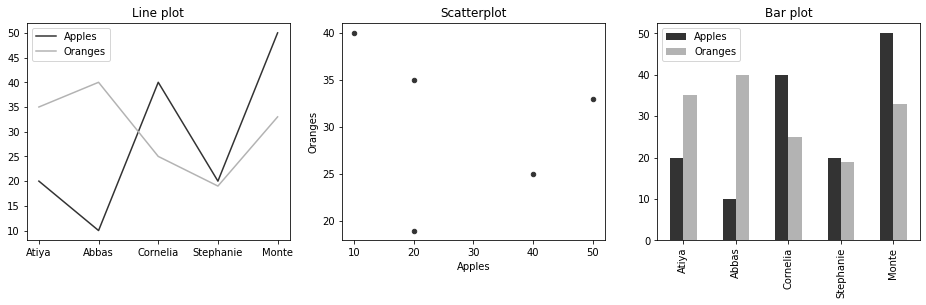

In [8]:
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(x='Apples', y='Oranges', kind='scatter', color=color[0], ax=ax2, title='Scatterplot')
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

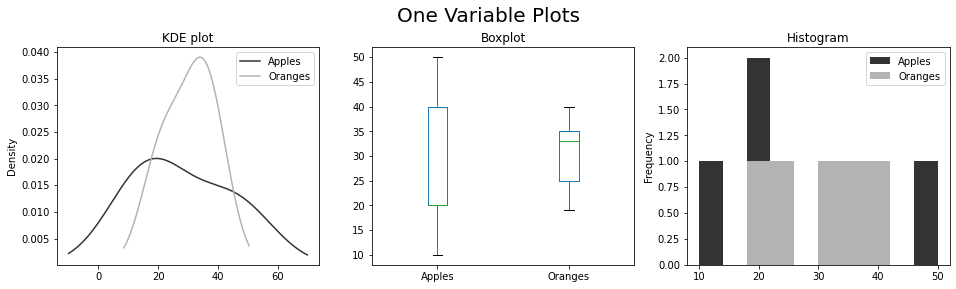

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

<AxesSubplot:ylabel='Density'>

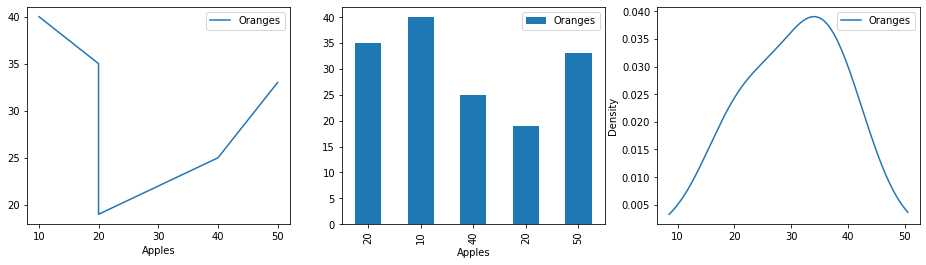

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
df.plot(x='Apples', kind='kde', ax=ax3)

## Diferencias entre seaborn y Pandas

<AxesSubplot:xlabel='count', ylabel='DEPARTMENT'>

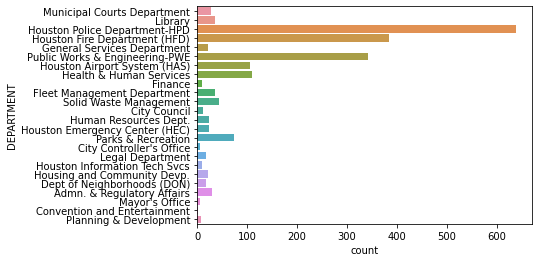

In [11]:
employee = pd.read_csv('data/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])

import seaborn as sns
sns.countplot(y='DEPARTMENT', data=employee)

<AxesSubplot:>

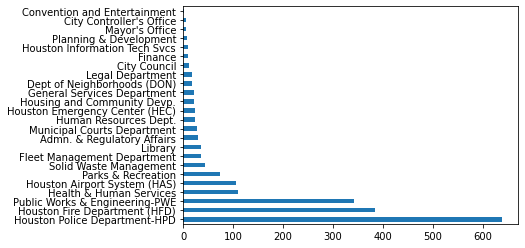

In [12]:
employee['DEPARTMENT'].value_counts().plot(kind='barh')

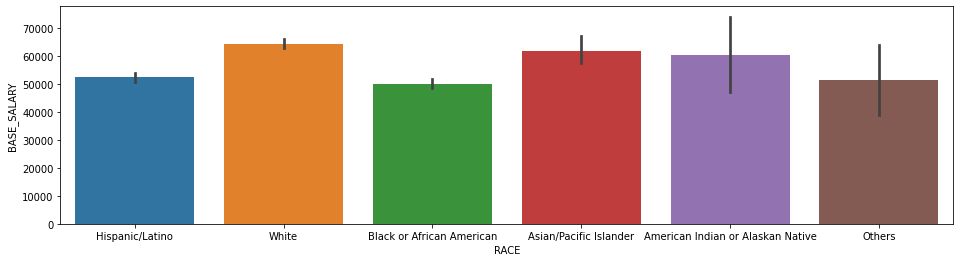

In [13]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

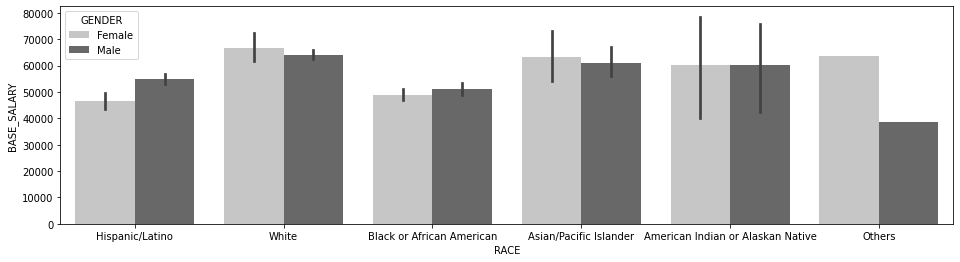

In [14]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

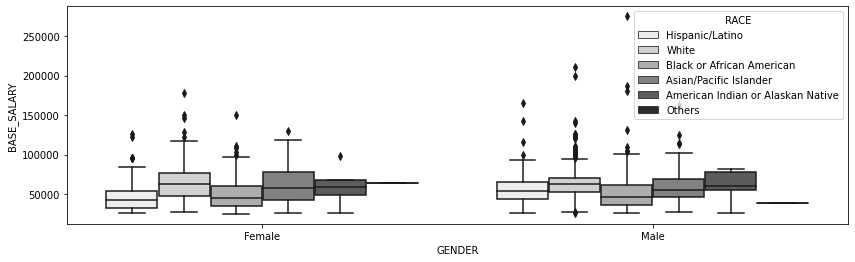

In [15]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

Text(0.5, 0.98, '')

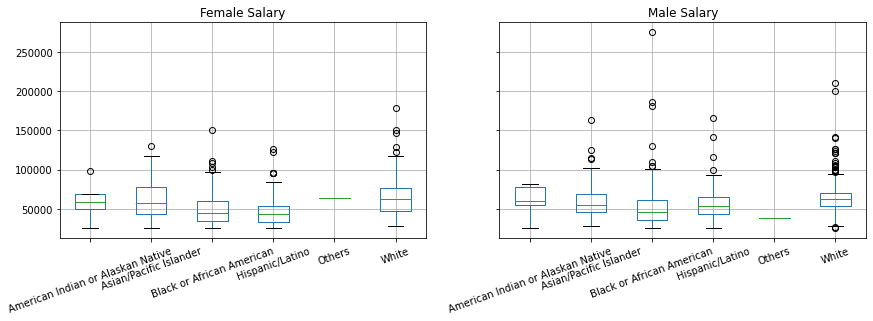

In [16]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

## Doing multivariate analysis with seaborn grids

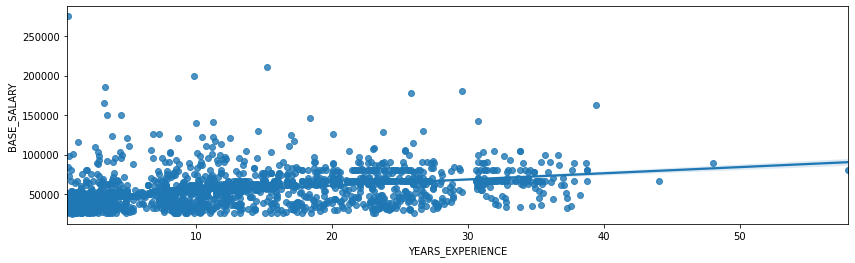

In [17]:
import seaborn as sns
employee = pd.read_csv('data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
days_hired = (pd.to_datetime('12-1-2016') - employee['HIRE_DATE'])

one_year = pd.Timedelta(365, unit='D')
employee['YEARS_EXPERIENCE'] =  days_hired / one_year

ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(14,4)

seaborn.axisgrid.FacetGrid

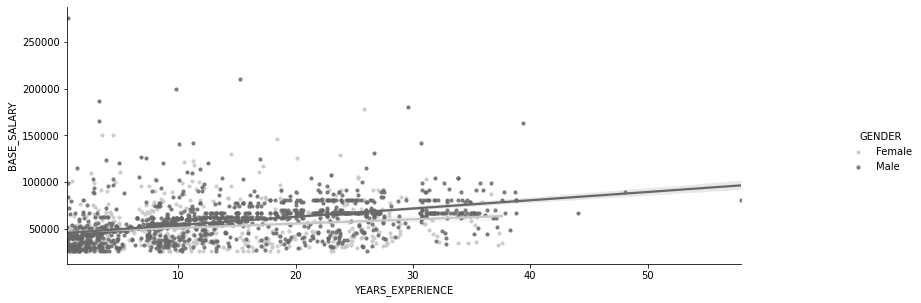

In [18]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', palette='Greys',
                  scatter_kws={'s':10}, data=employee)
grid.fig.set_size_inches(14, 4)
type(grid)

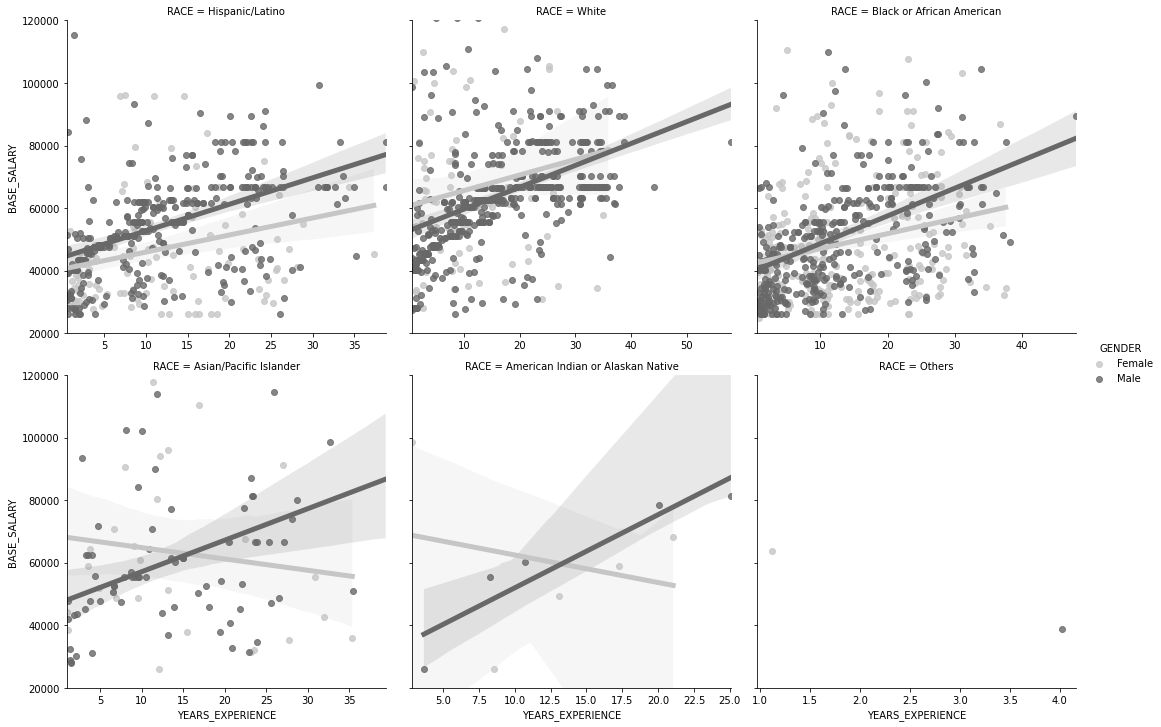

In [19]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  palette='Greys', sharex=False,
                  line_kws = {'linewidth':5},
                  data=employee)
grid.set(ylim=(20000, 120000))

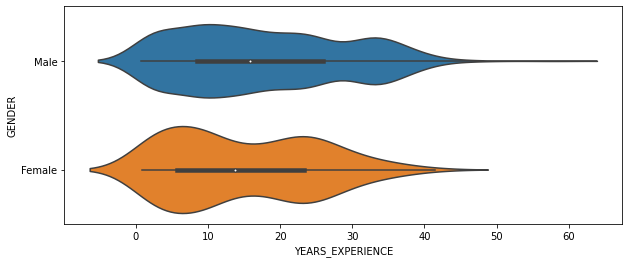

In [20]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2.DEPARTMENT.str.extract('(HPD|HFD)', expand=True)
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y='GENDER', data=emp2)
ax.figure.set_size_inches(10,4)
## Uncovering Simpson's paradox in the diamonds dataset with seaborn

c:\python\proyectos\venv\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python\proyectos\venv\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


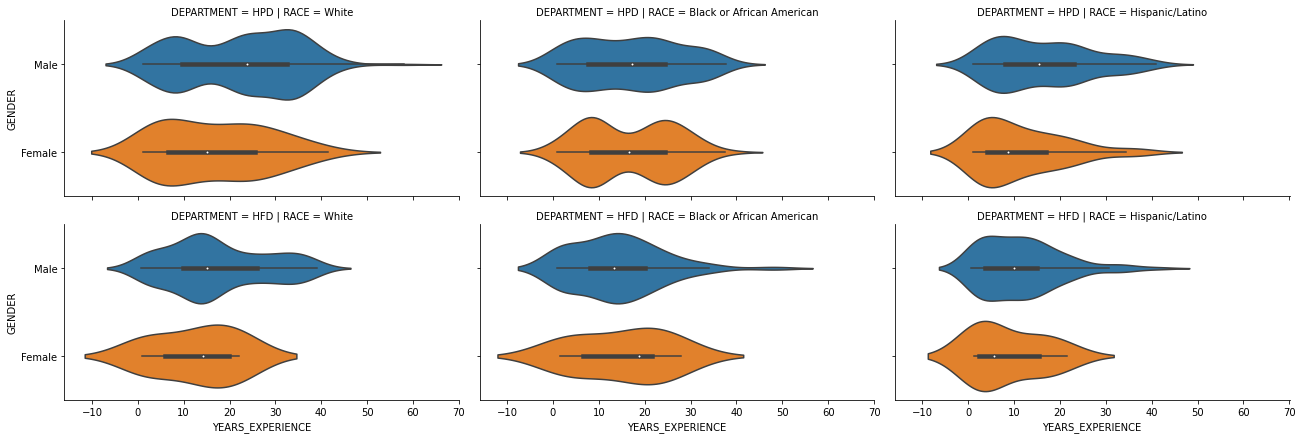

In [21]:
sns.factorplot(x ='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', row='DEPARTMENT',
               size=3, aspect=2,
               data=emp2, kind='violin')